## Data source and description

wick_airport_weather_data.csv<br>
https://www.metoffice.gov.uk/research/climate/maps-and-data/historic-station-data<br>

Wick Airport<br>
Location  336500E 952200N, Lat 58.454 Lon -3.088, 36m amsl<br>
Estimated data is marked with a * after the value.<br>
Missing data (more than 2 days missing in month) is marked by  ---.<br>
Sunshine data taken from an automatic Kipp & Zonen sensor marked with a #, otherwise sunshine data taken from a Campbell Stokes recorder.<br>
- Mean daily maximum temperature (tmax): degC
- Mean daily minimum temperature (tmin): degC
- Days of air frost (af): days
- Total rainfall (rain): mm
- Total sunshine duration (sun): hours

# Import data
Import data from data/wick_airport_weather_data.csv

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving wick_airport_weather_data.csv to wick_airport_weather_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import io

In [ ]:
df = pd.read_csv(io.StringIO(uploaded['wick_airport_weather_data.csv'].decode('utf-8')))
print(df)


      yyyy  mm  tmax tmin   af  rain  sun       status
0     1914   1   5.9  0.9  ---  48.3  ---          NaN
1     1914   2   7.7  2.3  ---  66.0  ---          NaN
2     1914   3   6.4  1.1  ---  76.7  ---          NaN
3     1914   4  10.8  4.4  ---  27.9  ---          NaN
4     1914   5  10.7  4.4  ---  61.0  ---          NaN
...    ...  ..   ...  ...  ...   ...  ...          ...
1297  2022   2   6.6  1.0    7  77.8  ---  Provisional
1298  2022   3   9.5  3.4    4  21.8  ---  Provisional
1299  2022   4   9.4  4.0    3  61.2  ---  Provisional
1300  2022   5  13.4  7.2    0  48.2  ---  Provisional
1301  2022   6  16.2  9.6    0  17.2  ---  Provisional

[1302 rows x 8 columns]


# Extract and transform
Make all the cleaning and transformation steps you judge necessary to analyse the data

In [ ]:
# convert yyyy and mm to a date, convert it to a datetime object and set it as the index
df['Date'] = pd.to_datetime(df['yyyy'].astype(str) + df['mm'].astype(str).str.zfill(2), format='%Y%m')
df = df.set_index("Date")
print(df)

            yyyy  mm  tmax tmin   af  rain  sun       status
Date                                                        
1914-01-01  1914   1   5.9  0.9  ---  48.3  ---          NaN
1914-02-01  1914   2   7.7  2.3  ---  66.0  ---          NaN
1914-03-01  1914   3   6.4  1.1  ---  76.7  ---          NaN
1914-04-01  1914   4  10.8  4.4  ---  27.9  ---          NaN
1914-05-01  1914   5  10.7  4.4  ---  61.0  ---          NaN
...          ...  ..   ...  ...  ...   ...  ...          ...
2022-02-01  2022   2   6.6  1.0    7  77.8  ---  Provisional
2022-03-01  2022   3   9.5  3.4    4  21.8  ---  Provisional
2022-04-01  2022   4   9.4  4.0    3  61.2  ---  Provisional
2022-05-01  2022   5  13.4  7.2    0  48.2  ---  Provisional
2022-06-01  2022   6  16.2  9.6    0  17.2  ---  Provisional

[1302 rows x 8 columns]


In [ ]:
# Find data types of each column and convert to float/int
result = df.dtypes
print(result)

yyyy       int64
mm         int64
tmax      object
tmin      object
af        object
rain      object
sun       object
status    object
dtype: object


In [ ]:
df['tmax'] = pd.to_numeric(df['tmax'], errors='coerce')
df['tmin'] = pd.to_numeric(df['tmin'], errors='coerce')
df['af'] = pd.to_numeric(df['af'], errors='coerce')
df['rain'] = pd.to_numeric(df['rain'], errors='coerce')
df['sun'] = pd.to_numeric(df['sun'], errors='coerce')


In [ ]:
df.dtypes

yyyy        int64
mm          int64
tmax      float64
tmin      float64
af        float64
rain      float64
sun       float64
status     object
dtype: object

In [ ]:
# Slice dataframe so we have af values
df = df["1930-12-01":"2022-06-01"]
print(df)

            yyyy  mm  tmax  tmin    af  rain  sun       status
Date                                                          
1930-12-01  1930  12   7.2   3.0   3.0  51.8  NaN          NaN
1931-01-01  1931   1   5.5   0.6   9.0  79.5  NaN          NaN
1931-02-01  1931   2   5.2   0.2   9.0  73.8  NaN          NaN
1931-03-01  1931   3   4.7  -0.5  14.0  29.7  NaN          NaN
1931-04-01  1931   4   8.3   2.9   0.0  46.2  NaN          NaN
...          ...  ..   ...   ...   ...   ...  ...          ...
2022-02-01  2022   2   6.6   1.0   7.0  77.8  NaN  Provisional
2022-03-01  2022   3   9.5   3.4   4.0  21.8  NaN  Provisional
2022-04-01  2022   4   9.4   4.0   3.0  61.2  NaN  Provisional
2022-05-01  2022   5  13.4   7.2   0.0  48.2  NaN  Provisional
2022-06-01  2022   6  16.2   9.6   0.0  17.2  NaN  Provisional

[1099 rows x 8 columns]


In [ ]:
# Impute sun values so that the monthly average correspond to nans

In [ ]:
sun_df = df[df.sun.notnull()]
sun_df

,yyyy,mm,tmax,tmin,af,rain,sun,status
Date,,,,,,,,
1945-03-01,1945,3,10.4,4.4,0.0,29.2,88.1,NaN
1945-04-01,1945,4,10.7,4.1,2.0,44.7,136.6,NaN
1945-05-01,1945,5,11.5,5.8,0.0,64.3,165.3,NaN
1945-06-01,1945,6,14.5,8.2,0.0,72.9,183.8,NaN
1945-07-01,1945,7,16.7,10.9,0.0,73.9,108.0,NaN
...,...,...,...,...,...,...,...,...
1993-05-01,1993,5,10.4,5.0,2.0,65.8,115.2,NaN
1993-08-01,1993,8,14.5,8.7,0.0,63.6,110.5,NaN
1993-09-01,1993,9,13.0,7.8,1.0,31.1,129.1,NaN


In [ ]:
# Group data first by year, then by month
g = df.groupby(["mm"])

# For each group, calculate the average of only the sun column
monthly_averages = g.aggregate({"sun":np.mean})


In [ ]:
monthly_averages_dict = monthly_averages.to_dict()["sun"]

In [ ]:
monthly_averages_dict

{1: 43.03958333333333,
 2: 72.93333333333334,
 3: 105.63265306122449,
 4: 145.25306122448978,
 5: 170.39795918367346,
 6: 162.92708333333334,
 7: 137.98125000000002,
 8: 135.9938775510204,
 9: 113.17142857142856,
 10: 85.79795918367347,
 11: 49.906122448979595,
 12: 31.829166666666666}

In [ ]:
df['sun'] = df.apply(lambda x: monthly_averages_dict[x['mm']] if pd.isnull(x['sun']) else x['sun'], axis=1)

In [ ]:
# Drop unneccessary columns. We drop yyyy and mm since it is incorporated in the Date. Additionally status as well since it will not help us in forecasting since not enough values.
df = df.drop(columns=['mm','yyyy', 'status'])
print(df)

            tmax  tmin    af  rain         sun
Date                                          
1930-12-01   7.2   3.0   3.0  51.8   31.829167
1931-01-01   5.5   0.6   9.0  79.5   43.039583
1931-02-01   5.2   0.2   9.0  73.8   72.933333
1931-03-01   4.7  -0.5  14.0  29.7  105.632653
1931-04-01   8.3   2.9   0.0  46.2  145.253061
...          ...   ...   ...   ...         ...
2022-02-01   6.6   1.0   7.0  77.8   72.933333
2022-03-01   9.5   3.4   4.0  21.8  105.632653
2022-04-01   9.4   4.0   3.0  61.2  145.253061
2022-05-01  13.4   7.2   0.0  48.2  170.397959
2022-06-01  16.2   9.6   0.0  17.2  162.927083

[1099 rows x 5 columns]


# Data exploration and charting
Perform Exploratory Data Analysis on the dataset.<br>
Present your findings in a few lines and charts.

In [ ]:
# Get an idea of missing values. 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1099 entries, 1930-12-01 to 2022-06-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmax    1091 non-null   float64
 1   tmin    1095 non-null   float64
 2   af      1096 non-null   float64
 3   rain    1090 non-null   float64
 4   sun     1099 non-null   float64
dtypes: float64(5)
memory usage: 51.5 KB


In [ ]:
# Since we still have some missing values, we impute using forward filling
df = df.ffill(axis = 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1099 entries, 1930-12-01 to 2022-06-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmax    1099 non-null   float64
 1   tmin    1099 non-null   float64
 2   af      1099 non-null   float64
 3   rain    1099 non-null   float64
 4   sun     1099 non-null   float64
dtypes: float64(5)
memory usage: 51.5 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


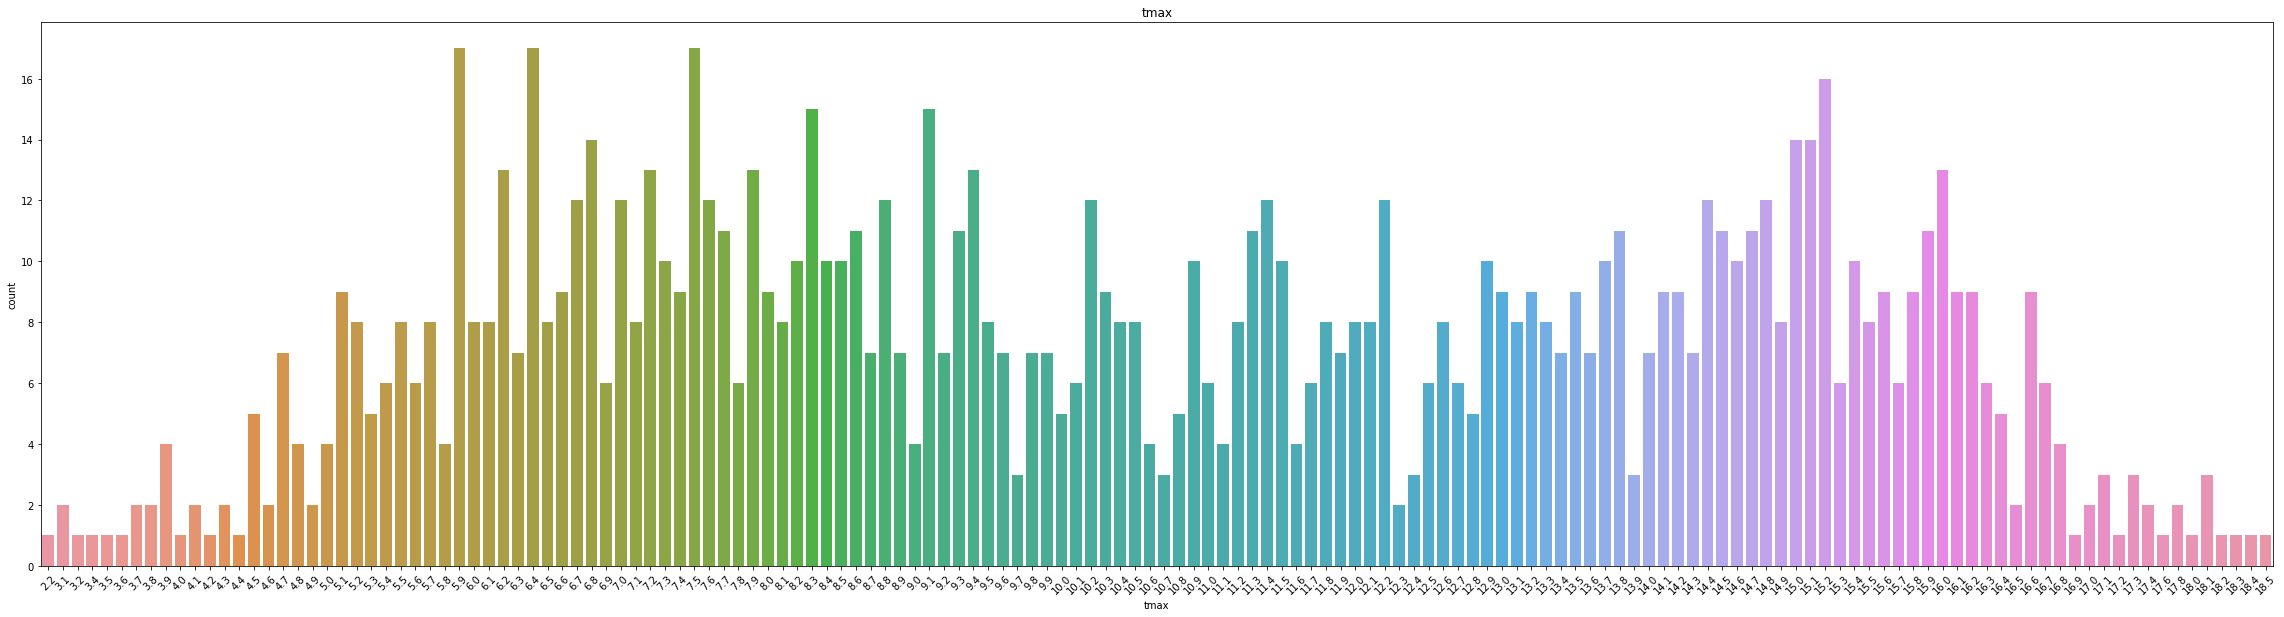

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


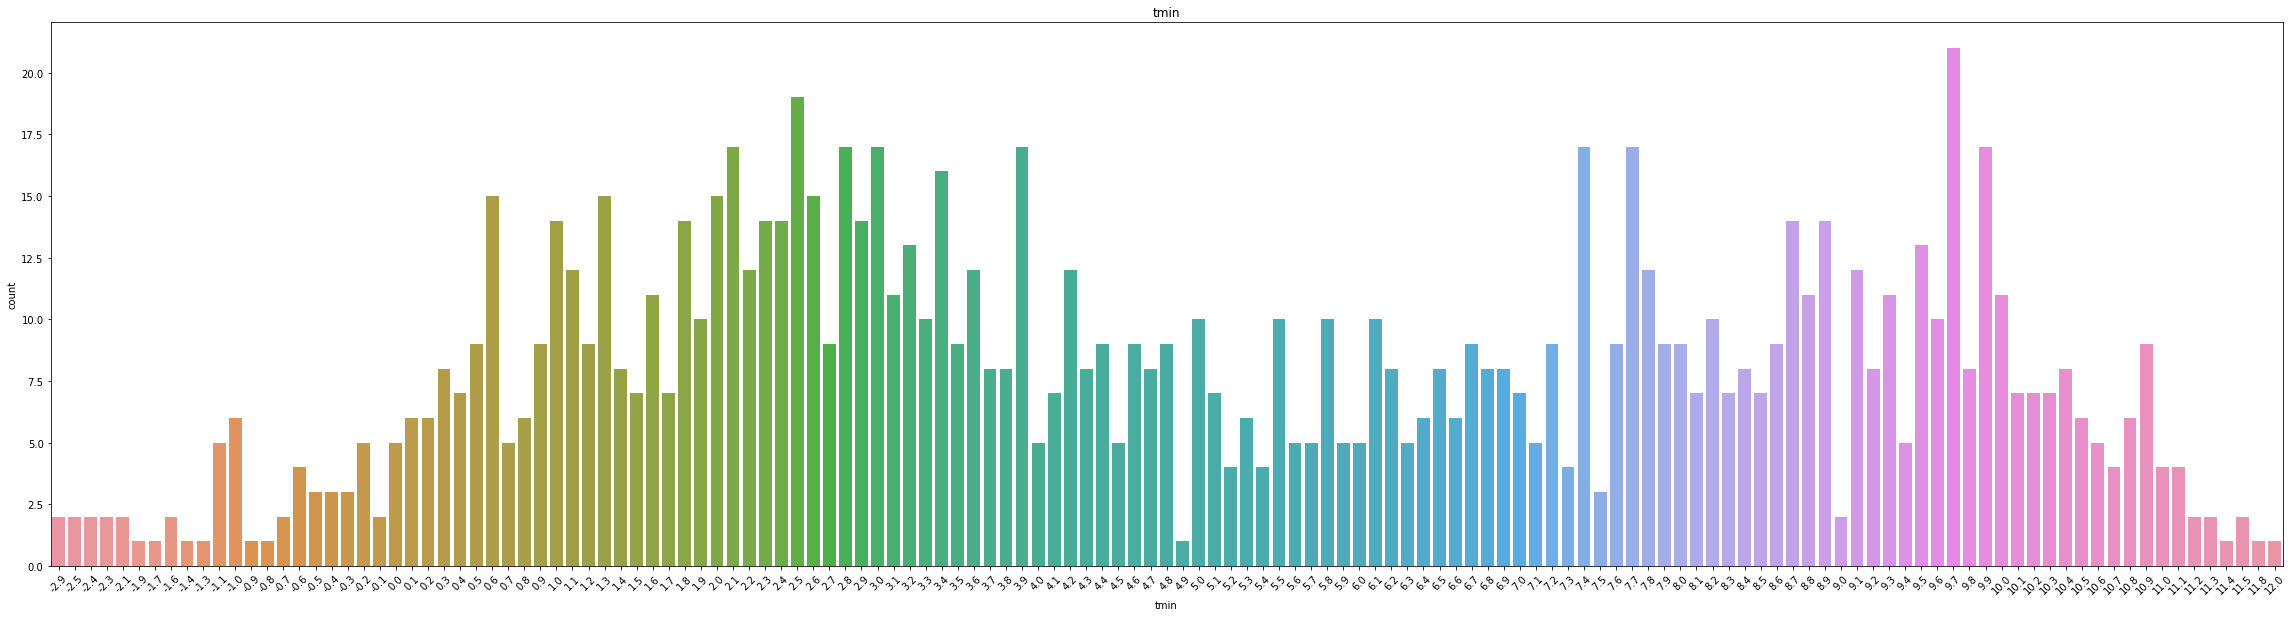

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


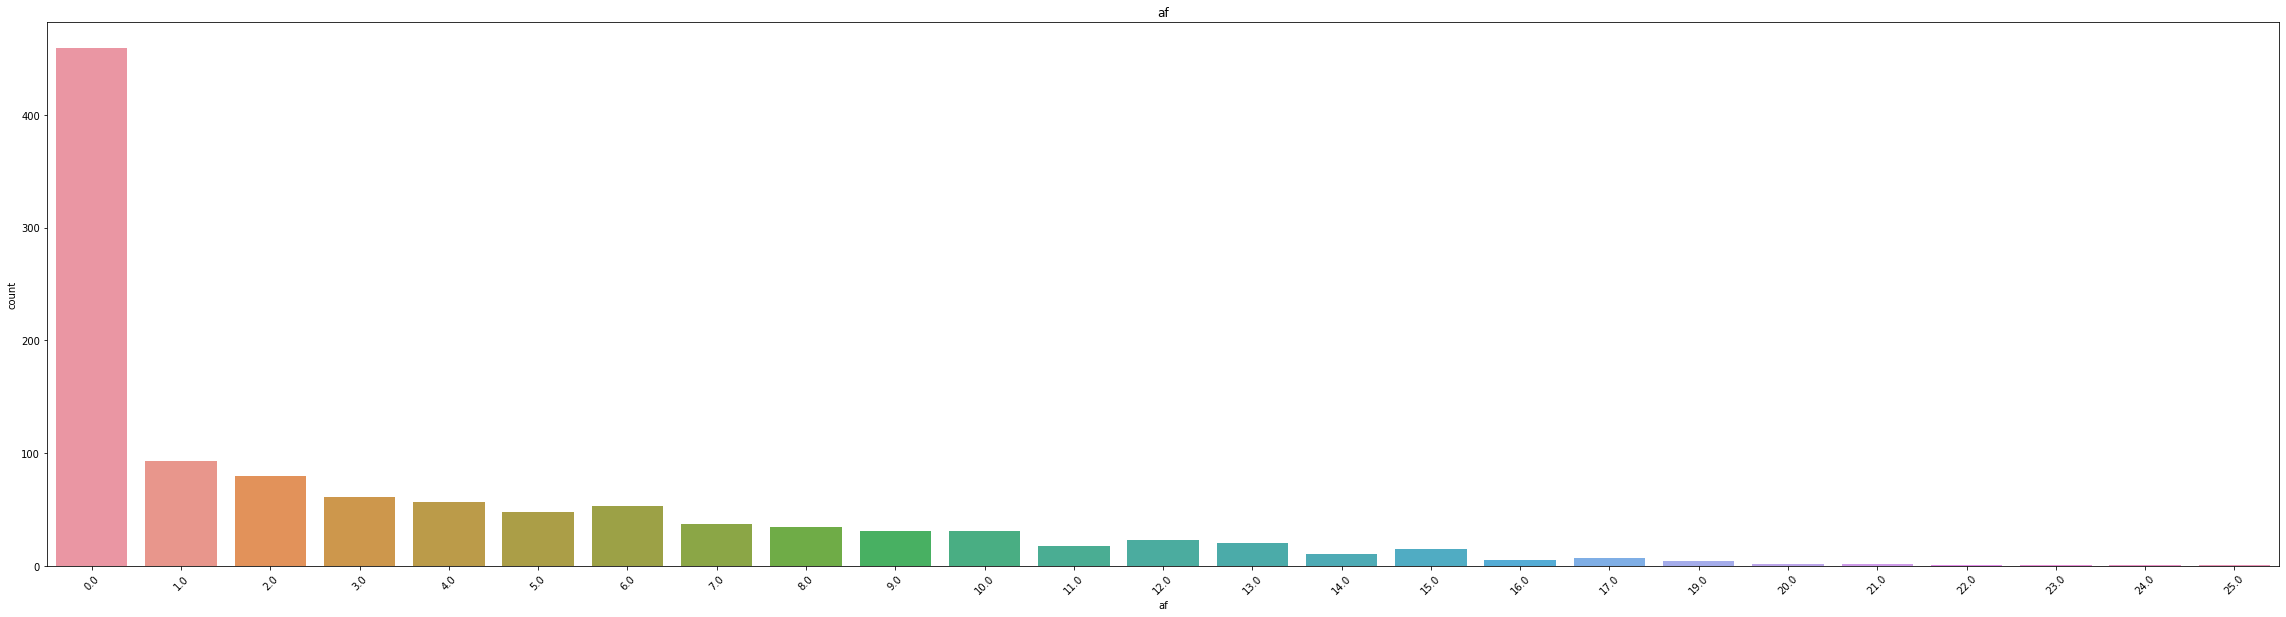

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


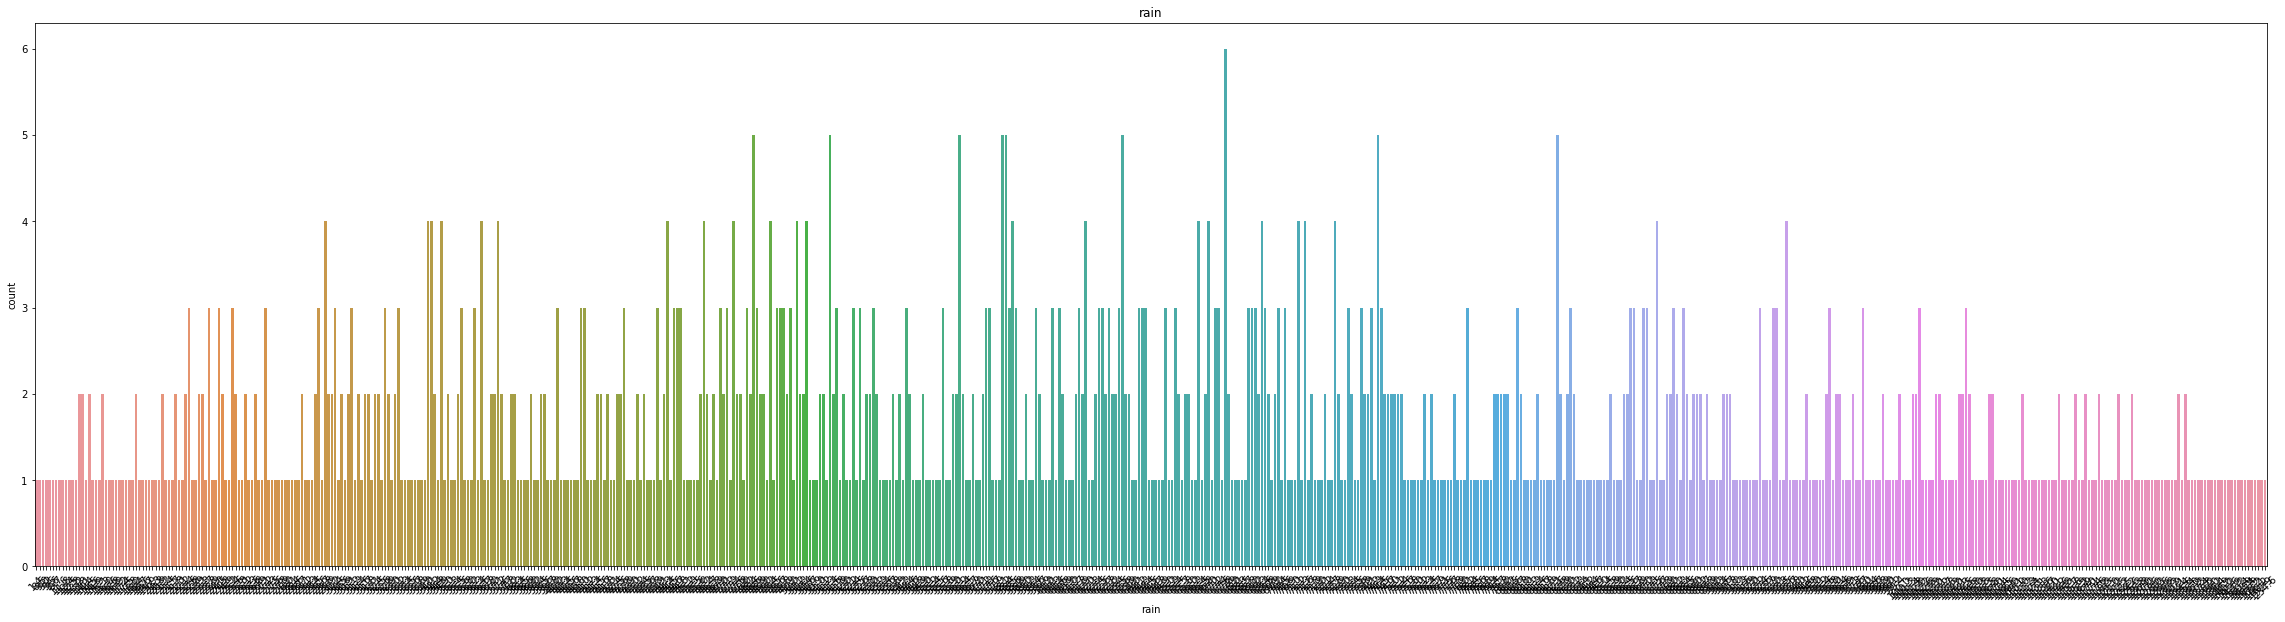

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


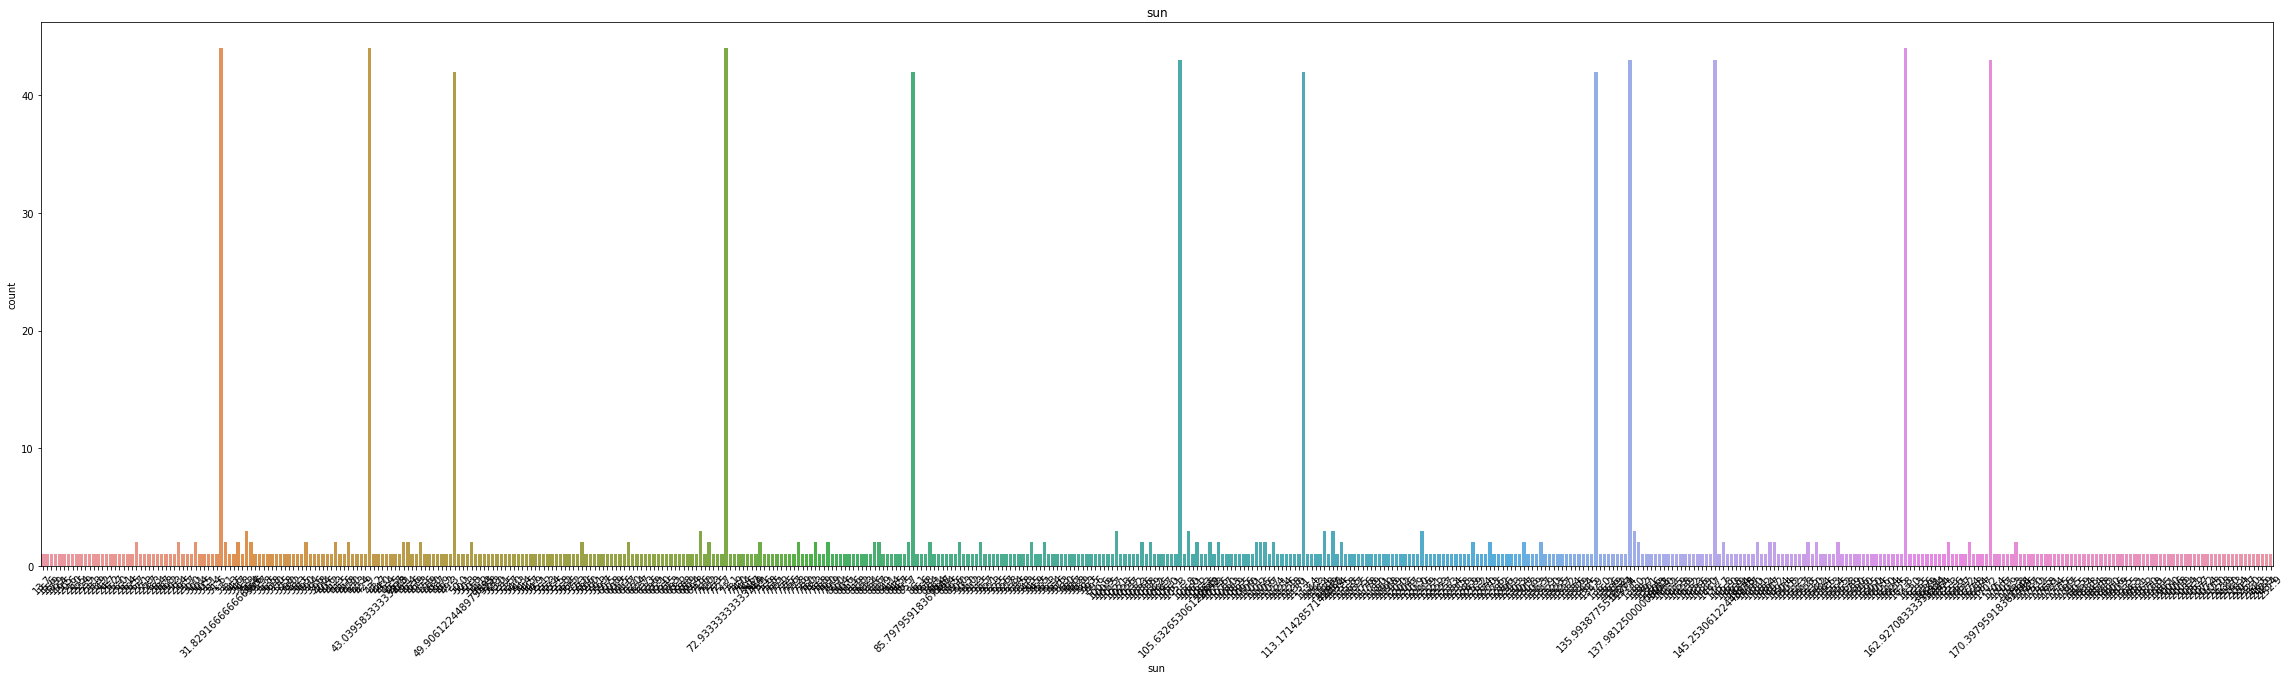

In [ ]:
# Get a count for all values

import seaborn as sns

for col in df.columns:
  plt.figure(figsize=(40,10))
  sns.countplot(df[col])
  plt.title(col)
  plt.xticks(rotation=45)
  plt.show()

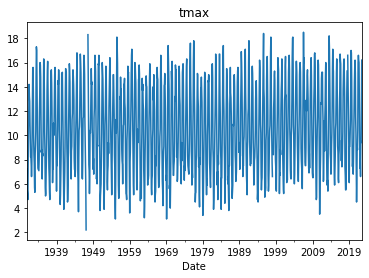

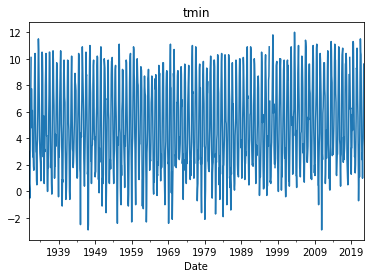

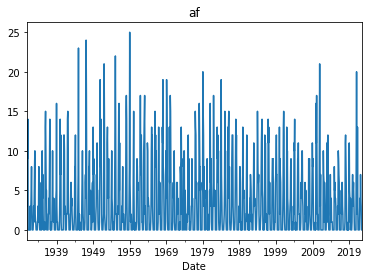

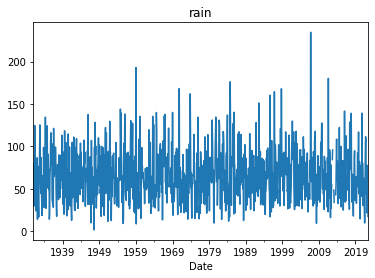

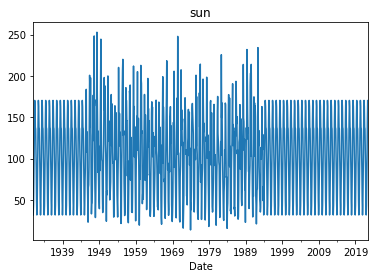

In [ ]:
# Plot all columns across time. We see pretty good consistency so we do not need perform any rolling means/medians etc.
for i, col in enumerate(df.columns):
    df[col].plot(fig=plt.figure(i))
    plt.title(col)

plt.show()


In [ ]:
# Build heatmap to visualize high/low values
df.style.background_gradient(cmap='Blues')



,tmax,tmin,af,rain,sun
Date,,,,,
1930-12-01 00:00:00,7.200000,3.000000,3.000000,51.800000,31.829167
1931-01-01 00:00:00,5.500000,0.600000,9.000000,79.500000,43.039583
1931-02-01 00:00:00,5.200000,0.200000,9.000000,73.800000,72.933333
1931-03-01 00:00:00,4.700000,-0.500000,14.000000,29.700000,105.632653
1931-04-01 00:00:00,8.300000,2.900000,0.000000,46.200000,145.253061
1931-05-01 00:00:00,10.600000,6.000000,0.000000,124.600000,170.397959
1931-06-01 00:00:00,12.000000,7.100000,0.000000,72.800000,162.927083
1931-07-01 00:00:00,14.200000,10.100000,0.000000,74.500000,137.981250
1931-08-01 00:00:00,13.200000,10.100000,0.000000,27.100000,135.993878


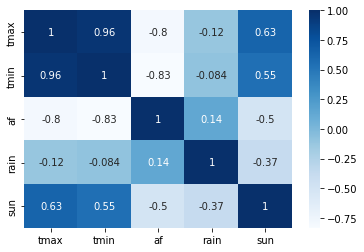

In [ ]:
# Plot correlaton map to see correlation between each column with each other. Darker values show high correlation while lighter values show low correlation.
# We see that tmax and tmin is highly correlated with each other and tmax/tmin are also very correlated with sun values. 
# We can get a simple model just by modeling tmax, tmin and sun but we will let the model figure it out by itself.
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)


# Modelling
Choose a model, backtest it and generate forecasts for the 24 months ahead.<br>
Explain your model choice in a few lines and present backtesting / forecasting results using tables and charts understandable for analysts who do not write code or build statistical models.


In [ ]:
# This is a simple multivariate time series forecasting problem since we have pretty common seasonality in our variables so I will stick with a common
# method using Vector Auto Regression (VAR). 
# In a VAR model, each variable is a linear function of the past values of itself and the past values of all the other variables.
# VAR is able to understand and use the relationship between several variables.
# This is useful for describing the dynamic behavior of the data and also provides better forecasting results.

In [ ]:
# Split into train/test set
nobs = 24
train, test = df[0:-nobs], df[-nobs:]

# Check size
print(train.shape)  
print(test.shape)  




(1075, 5)
(24, 5)


In [ ]:
# Since the VAR model requires the time series you want to forecast to be stationary, it is customary to check all the time series in the system for stationarity.


def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [ ]:
# ADF Test on each column
for name, column in train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')


    Augmented Dickey-Fuller Test on "tmax" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.5246
 No. Lags Chosen       = 22
 Critical value 1%     = -3.437
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "tmin" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.2913
 No. Lags Chosen       = 22
 Critical value 1%     = -3.437
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "af" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05


In [ ]:
# We see that our data is stationary so we can advance.
# By the way, if a series is found to be non-stationary, you make it stationary by differencing the series once and repeat the test again until it becomes stationary.

In [ ]:
# Grid Search for Order P
for i in [1,2,3,4,5,6,7,8,9, 10, 11, 12, 13, 14, 15]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-

Order = 1
AIC:  15.5787113978276
BIC:  15.717793668080919

Order = 2
AIC:  15.110747226637626
BIC:  15.36592127681907

Order = 3
AIC:  14.666367829949465
BIC:  15.037806736041311

Order = 4
AIC:  14.45272585574287
BIC:  14.940603117551474

Order = 5
AIC:  14.404188706108522
BIC:  15.00867824869663

Order = 6
AIC:  14.340001936581906
BIC:  15.061278111707146

Order = 7
AIC:  14.316368612670773
BIC:  15.154606200230347

Order = 8
AIC:  14.291564176636047
BIC:  15.246938386117641

Order = 9
AIC:  14.254733951670737
BIC:  15.327420423609698

Order = 10
AIC:  14.221379155039333
BIC:  15.411553962482149

Order = 11
AIC:  14.212379719727885
BIC:  15.520219369701987

Order = 12
AIC:  14.156970858205577
BIC:  15.582652293195505



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-

Order = 13
AIC:  14.136955640600625
BIC:  15.680656240030588

Order = 14
AIC:  14.162386428344277
BIC:  15.824284010067146

Order = 15
AIC:  14.175205973981967
BIC:  15.955478795774725



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
# As you keep on increasing the value of the P model becomes more complex. AIC penalizes the complex model.
# As we can see, AIC begins to drop as we fit the more complex model but, after a certain amount of time AIC begins to increase again. 
# It’s because AIC is punishing these models for being too complex.
# VAR(13) returns the lowest score and after that again AIC starts increasing, hence we will build the VAR model of order 13.

result = model.fit(13)
result.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 21, Oct, 2022
Time:                     01:01:19
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    15.6807
Nobs:                     1062.00    HQIC:                   14.7220
Log likelihood:          -14711.3    FPE:                1.38023e+06
AIC:                      14.1370    Det(Omega_mle):     1.02100e+06
--------------------------------------------------------------------
Results for equation tmax
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            2.797099         1.105262            2.531           0.011
L1.tmax          0.488274         0.047668           10.243           0.000
L1.tmin         -0.050312         0.057026           -0.882           0.378
L1.af

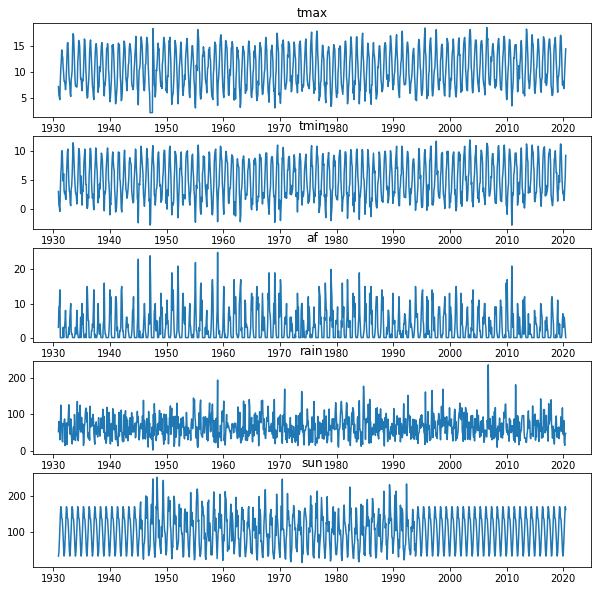

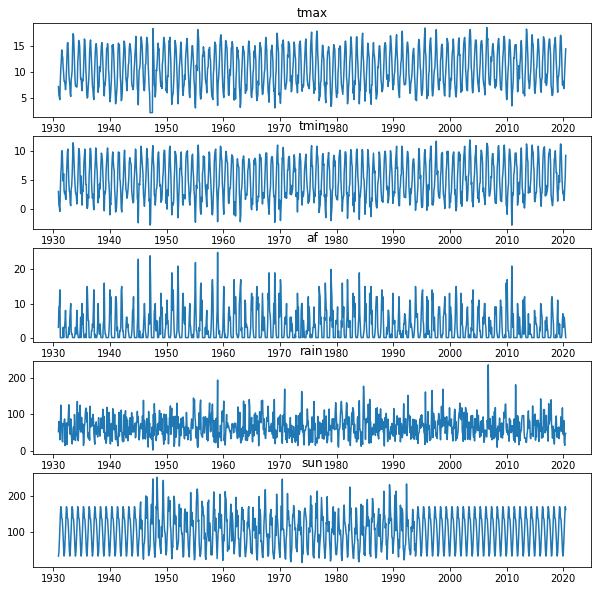

In [ ]:
# Visualizing the input
# The axis label above shows the plot below.
result.plot()

In [ ]:
# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic
# Serial correlation of residuals is used to check if there is any leftover pattern in the residuals (errors).

# If there is any correlation left in the residuals, then, there is some pattern in the time series that is still left to be explained by the model. 
# In that case, the typical course of action is to either increase the order of the model or induce more predictors into the system or look for a different algorithm to model the time series.

# So, checking for serial correlation is to ensure that the model is sufficiently able to explain the variances and patterns in the time series.

from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(result.resid)

for col, val in zip(df.columns, out):
    print((col), ':', round(val, 2))


tmax : 1.99
tmin : 2.0
af : 2.01
rain : 2.0
sun : 2.02


In [ ]:
# The serial correlation seems quite alright. So we can proceed with the forecast.



In [ ]:
# Get the lag order
lag_order = result.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = df.values[-lag_order:]
forecast_input


13


array([[ 16.        ,   8.8       ,   0.        ,  23.8       ,
        162.92708333],
       [ 16.6       ,  11.5       ,   0.        ,   9.6       ,
        137.98125   ],
       [ 16.2       ,  10.5       ,   0.        ,  25.4       ,
        135.99387755],
       [ 16.        ,  10.3       ,   0.        ,  87.2       ,
        113.17142857],
       [ 12.7       ,   7.        ,   0.        , 111.4       ,
         85.79795918],
       [  9.3       ,   4.4       ,   2.        , 109.        ,
         49.90612245],
       [  7.3       ,   2.4       ,   4.        ,  43.6       ,
         31.82916667],
       [  8.        ,   2.9       ,   3.        ,  49.4       ,
         43.03958333],
       [  6.6       ,   1.        ,   7.        ,  77.8       ,
         72.93333333],
       [  9.5       ,   3.4       ,   4.        ,  21.8       ,
        105.63265306],
       [  9.4       ,   4.        ,   3.        ,  61.2       ,
        145.25306122],
       [ 13.4       ,   7.2       ,   0.   

In [ ]:
# Forecast
fc = result.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns)
df_forecast


,tmax,tmin,af,rain,sun
Date,,,,,
2020-07-01,16.793178,10.447917,-1.336178,65.404342,159.688703
2020-08-01,16.751663,10.472696,-1.288067,70.777938,132.247236
2020-09-01,14.903621,9.085567,-0.230997,78.997313,101.631876
2020-10-01,12.211690,6.640285,1.163889,84.433813,80.460505
2020-11-01,9.065811,3.927625,3.822496,90.473883,52.145213
2020-12-01,6.975856,1.715631,6.890980,80.407087,34.134452
2021-01-01,6.114222,1.164187,7.851521,68.102243,41.795470
2021-02-01,6.346086,0.991034,7.901210,61.765615,73.146607
2021-03-01,7.712234,1.854448,6.596678,54.109383,115.024651


In [ ]:
# Rename columns so they have forecast appended
df_forecast = df_forecast.rename(columns={'tmax': 'tmax_forecast', 'tmin': 'tmin_forecast', 'af': 'af_forecast', 'rain': 'rain_forecast', 'sun': 'sun_forecast'})


In [ ]:
# Plot of Forecast vs Actuals
df_results = df_forecast.loc[:, ['tmax_forecast', 'tmin_forecast', 'af_forecast', 'rain_forecast', 'sun_forecast']]

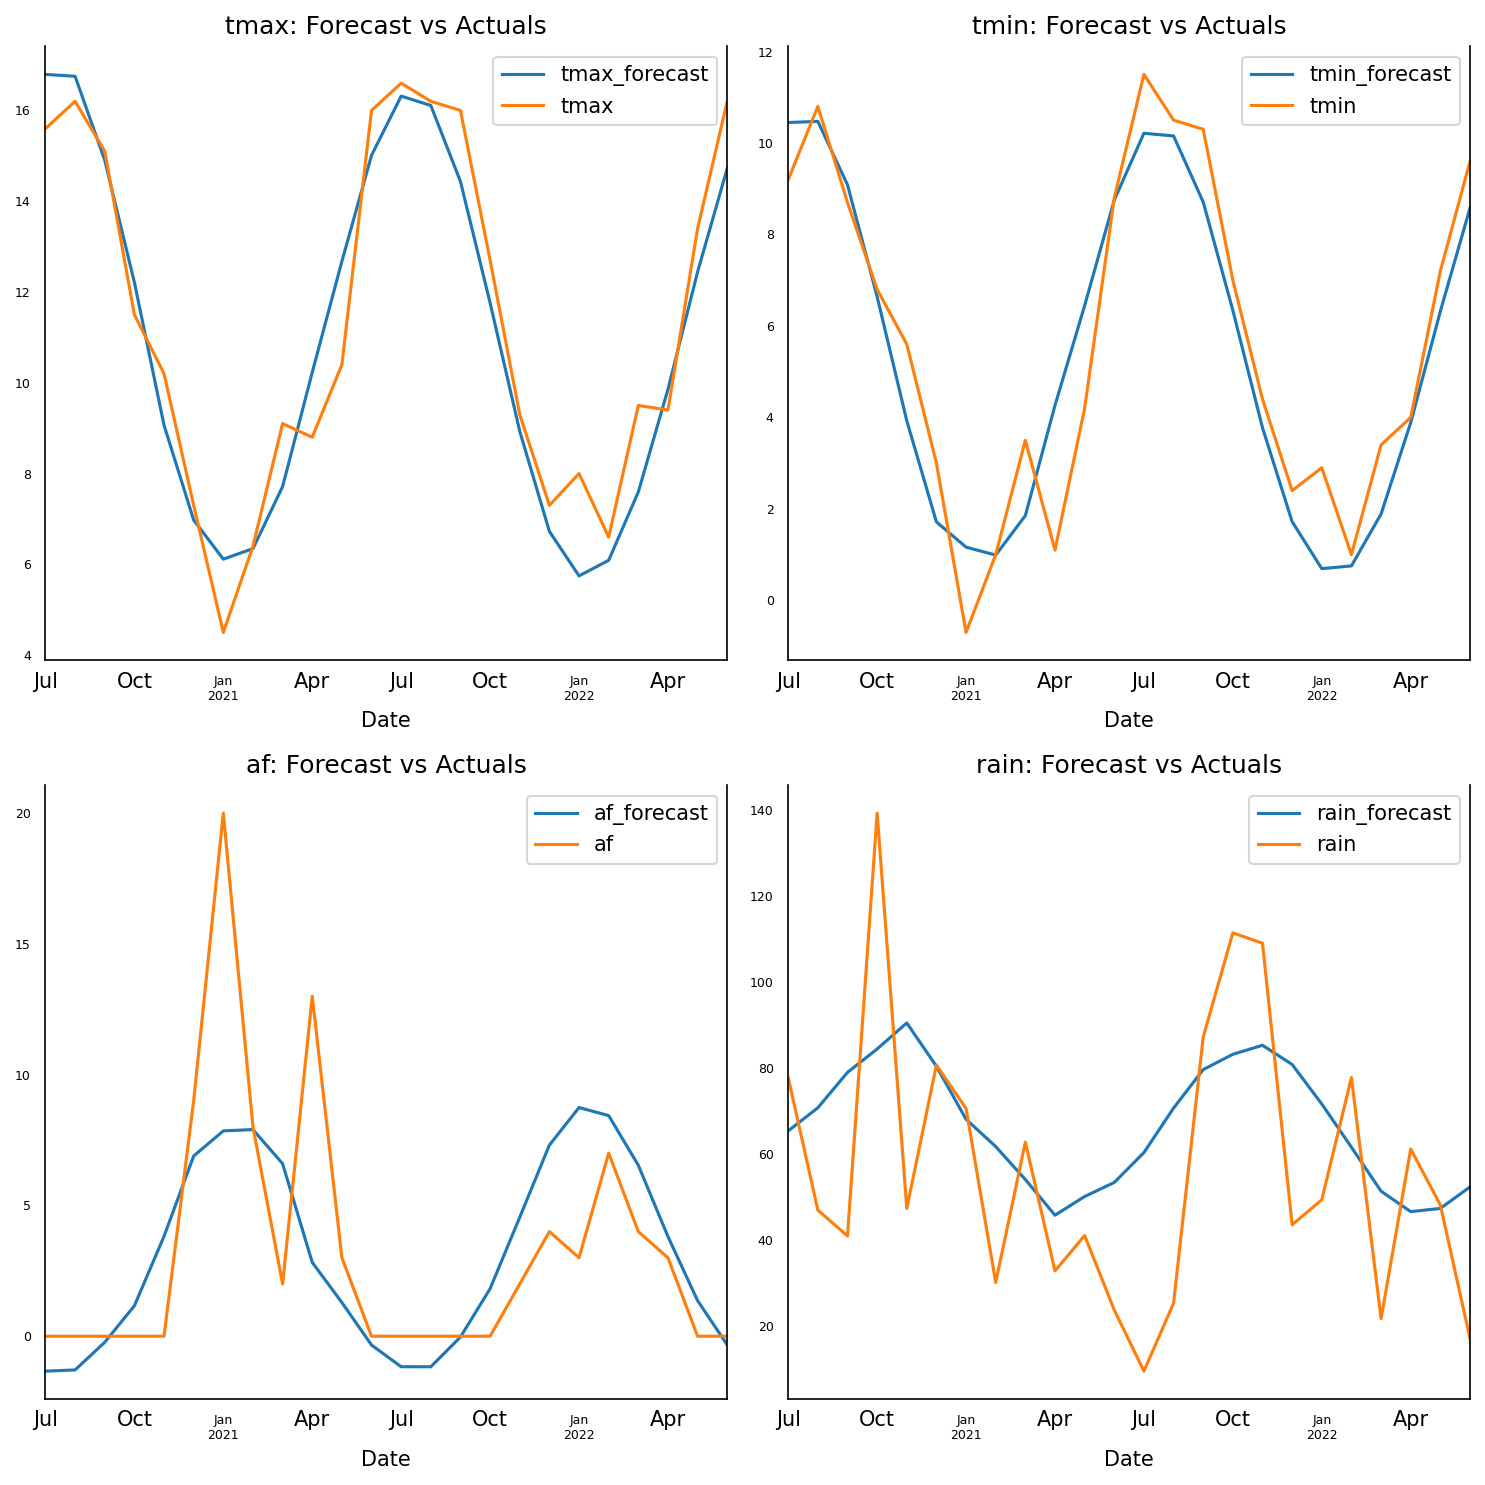

In [ ]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();


In [ ]:
# Evaluate the Forecasts
# To evaluate the forecasts, let’s compute a comprehensive set of metrics, namely, the MAPE, ME, MAE, MPE, RMSE, corr and minmax.

from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: tmin')
accuracy_prod = forecast_accuracy(df_results['tmin_forecast'].values, test['tmin'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))


Forecast Accuracy of: tmin
mape :  0.4185
me :  -0.3083
mae :  1.0506
mpe :  -0.1193
rmse :  1.3253
corr :  0.9331
minmax :  0.2768


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  from ipykernel import kernelapp as app


In [ ]:
# We see that the errors are very low and corr is very high so we it is safe to say that we have a good model to predict tmin.
# Since we have a good model, now we will use the same model to forecast the next 24 months for tmin.

In [ ]:
# Get the lag order
lag_order = result.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = df.values[-lag_order:]
forecast_input


13


array([[ 16.        ,   8.8       ,   0.        ,  23.8       ,
        162.92708333],
       [ 16.6       ,  11.5       ,   0.        ,   9.6       ,
        137.98125   ],
       [ 16.2       ,  10.5       ,   0.        ,  25.4       ,
        135.99387755],
       [ 16.        ,  10.3       ,   0.        ,  87.2       ,
        113.17142857],
       [ 12.7       ,   7.        ,   0.        , 111.4       ,
         85.79795918],
       [  9.3       ,   4.4       ,   2.        , 109.        ,
         49.90612245],
       [  7.3       ,   2.4       ,   4.        ,  43.6       ,
         31.82916667],
       [  8.        ,   2.9       ,   3.        ,  49.4       ,
         43.03958333],
       [  6.6       ,   1.        ,   7.        ,  77.8       ,
         72.93333333],
       [  9.5       ,   3.4       ,   4.        ,  21.8       ,
        105.63265306],
       [  9.4       ,   4.        ,   3.        ,  61.2       ,
        145.25306122],
       [ 13.4       ,   7.2       ,   0.   

In [ ]:
# Forecast
fc = result.forecast(y=forecast_input, steps=24)
range_date = pd.date_range(start ='06/01/2022', end ='06/01/2024',
                                                   freq ='M')
df_forecast = pd.DataFrame(fc, index=range_date, columns=df.columns)
df_forecast


,tmax,tmin,af,rain,sun
2022-06-30,16.793178,10.447917,-1.336178,65.404342,159.688703
2022-07-31,16.751663,10.472696,-1.288067,70.777938,132.247236
2022-08-31,14.903621,9.085567,-0.230997,78.997313,101.631876
2022-09-30,12.211690,6.640285,1.163889,84.433813,80.460505
2022-10-31,9.065811,3.927625,3.822496,90.473883,52.145213
2022-11-30,6.975856,1.715631,6.890980,80.407087,34.134452
2022-12-31,6.114222,1.164187,7.851521,68.102243,41.795470
2023-01-31,6.346086,0.991034,7.901210,61.765615,73.146607
2023-02-28,7.712234,1.854448,6.596678,54.109383,115.024651
2023-03-31,10.229800,4.263890,2.823779,45.822811,148.284949


In [ ]:
# Rename columns so they have forecast appended
df_forecast = df_forecast.rename(columns={'tmin': 'tmin_forecast'})


In [ ]:
df_results = df_forecast.loc[:, ['tmin_forecast']]
df_results

,tmin_forecast
2022-06-30,10.447917
2022-07-31,10.472696
2022-08-31,9.085567
2022-09-30,6.640285
2022-10-31,3.927625
2022-11-30,1.715631
2022-12-31,1.164187
2023-01-31,0.991034
2023-02-28,1.854448
2023-03-31,4.263890


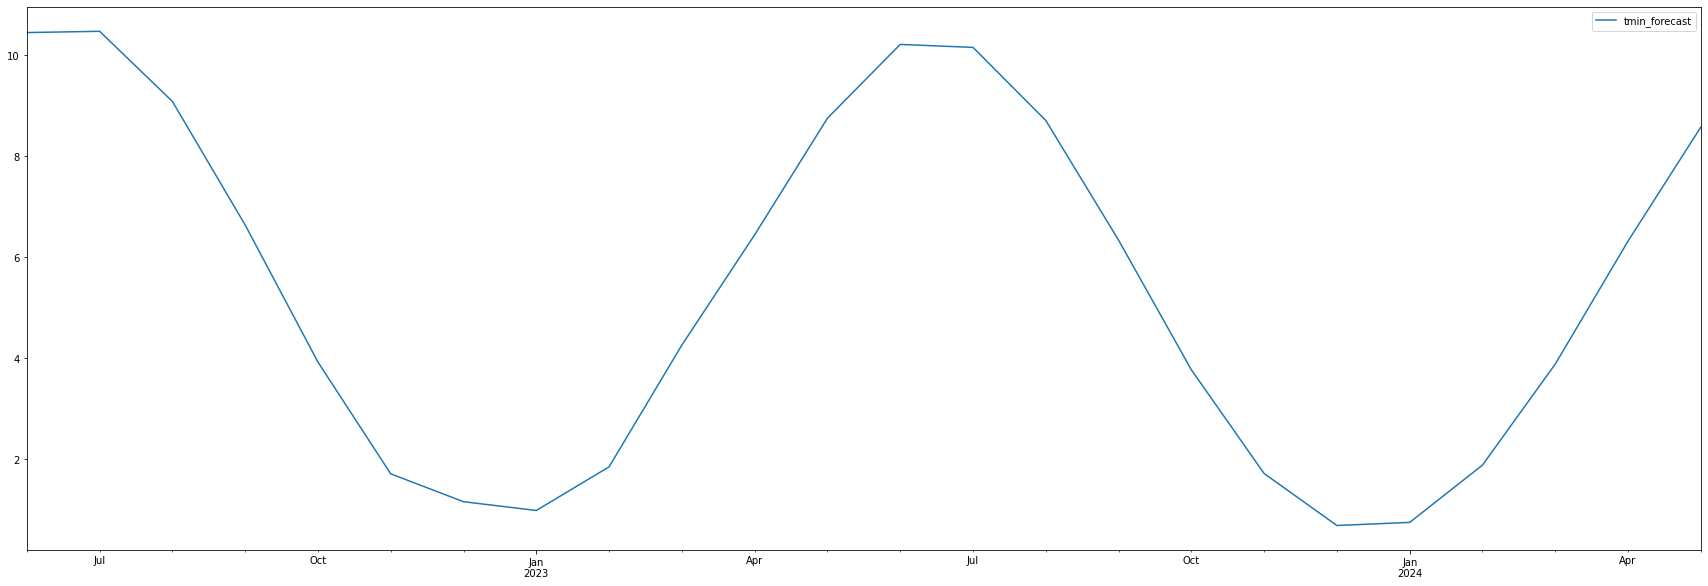

In [ ]:
df_results.plot(figsize=(30,10))

In [ ]:
# Hence, we see a general trend for the next 2 years for tmin